
## Final Project Submission
Please fill out:
* Student name: Justin Grisanti
* Student pace: self-paced
* Scheduled project review date/time: 12/15/2021 @ 3:30 pm
* Instructor name: Claude Fried
* Blog post URL: TBD

Total Time to Run: approx. 12 minutes

# Section 1: Business Understanding

The purpose of this section is to understand what the business problem and the stakeholders that will be understanding the work that I am performing. My business problem relates to the fires in Australia. The Australian govenment (my stakeholder) has contracted me to predict rain patterns so they can try to strategically plan how to combat the wildfires going across the continent.

The main purpose of this classification model is predictive, meaning that given charactaristics of rain data on a given day, the model should be able to predict whether it rained or not.

# Section 2: Data Understanding

As shown below, this data has many different weather-related metrics, such as the wind speed, humidity, pressure, whether it was sunny or cloudy, and temperature. These seem like appropriate parameters to run a classification-based model in order to predict whether or not it will rain the next day.

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import make_scorer, classification_report, log_loss, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, plot_confusion_matrix, auc, roc_curve
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.base import clone
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import statsmodels as sm
import sklearn.preprocessing as preprocessing
from scipy import stats
import seaborn as sns
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data from csv

rain_data = pd.read_csv('data/WeatherAUS.csv')

In [3]:
rain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Please see the following column descriptions:

> **MinTemp:** The minimum temperature in degrees celsius

>**MaxTemp:** The maximum temperature in degrees celsius

>**Rainfall:** The amount of rainfall recorded for the day in mm

>**Evaporation:** The so-called Class A pan evaporation (mm) in the 24 hours to 9am

>**Sunshine:** The number of hours of bright sunshine in the day.

>**WindGustDir:** The direction of the strongest wind gust in the 24 hours to midnight

>**WindGustSpeed:** The speed (km/h) of the strongest wind gust in the 24 hours to midnight

>**WindDir9am:** Direction of the wind at 9am

>**WindDir3pm:** Direction of the wind at 3pm

>**WindSpeed9am:** Wind speed (km/hr) averaged over 10 minutes prior to 9am

>**WindSpeed3pm:** Wind speed (km/hr) averaged over 10 minutes prior to 3pm

>**Humidity9am:** Humidity (percent) at 9am

>**Humidity3pm:** Humidity (percent) at 3pm

>**Pressure9am:** Atmospheric pressure (hpa) reduced to mean sea level at 9am

>**Pressure3pm:** Atmospheric pressure (hpa) reduced to mean sea level at 3pm

>**Cloud9am:** Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.

>**Cloud3pm:** Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values

>**Temp9am:** Temperature (degrees C) at 9am

>**Temp3pm:** Temperature (degrees C) at 3pm

>**RainToday:** Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

>**RainTomorrow:** The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".


In [4]:
# To show all columns and rows

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

rain_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
# Inspect Target Variable

rain_data['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [6]:
# Ensure we get a fair spread of data across the country

rain_data['Location'].value_counts()

Canberra            3436
Sydney              3344
Melbourne           3193
Adelaide            3193
Hobart              3193
Darwin              3193
Brisbane            3193
Perth               3193
Cairns              3040
AliceSprings        3040
MountGambier        3040
Wollongong          3040
Albury              3040
Albany              3040
MountGinini         3040
Ballarat            3040
GoldCoast           3040
Bendigo             3040
Launceston          3040
Townsville          3040
Penrith             3039
Newcastle           3039
Tuggeranong         3039
Woomera             3009
Richmond            3009
Moree               3009
BadgerysCreek       3009
Nuriootpa           3009
PerthAirport        3009
Mildura             3009
PearceRAAF          3009
WaggaWagga          3009
Dartmoor            3009
Sale                3009
Williamtown         3009
MelbourneAirport    3009
Witchcliffe         3009
CoffsHarbour        3009
Cobar               3009
NorfolkIsland       3009


In [7]:
# Remove columns that dont have any nulls

columns_with_nulls = rain_data.drop(columns = ['Date','Location',])

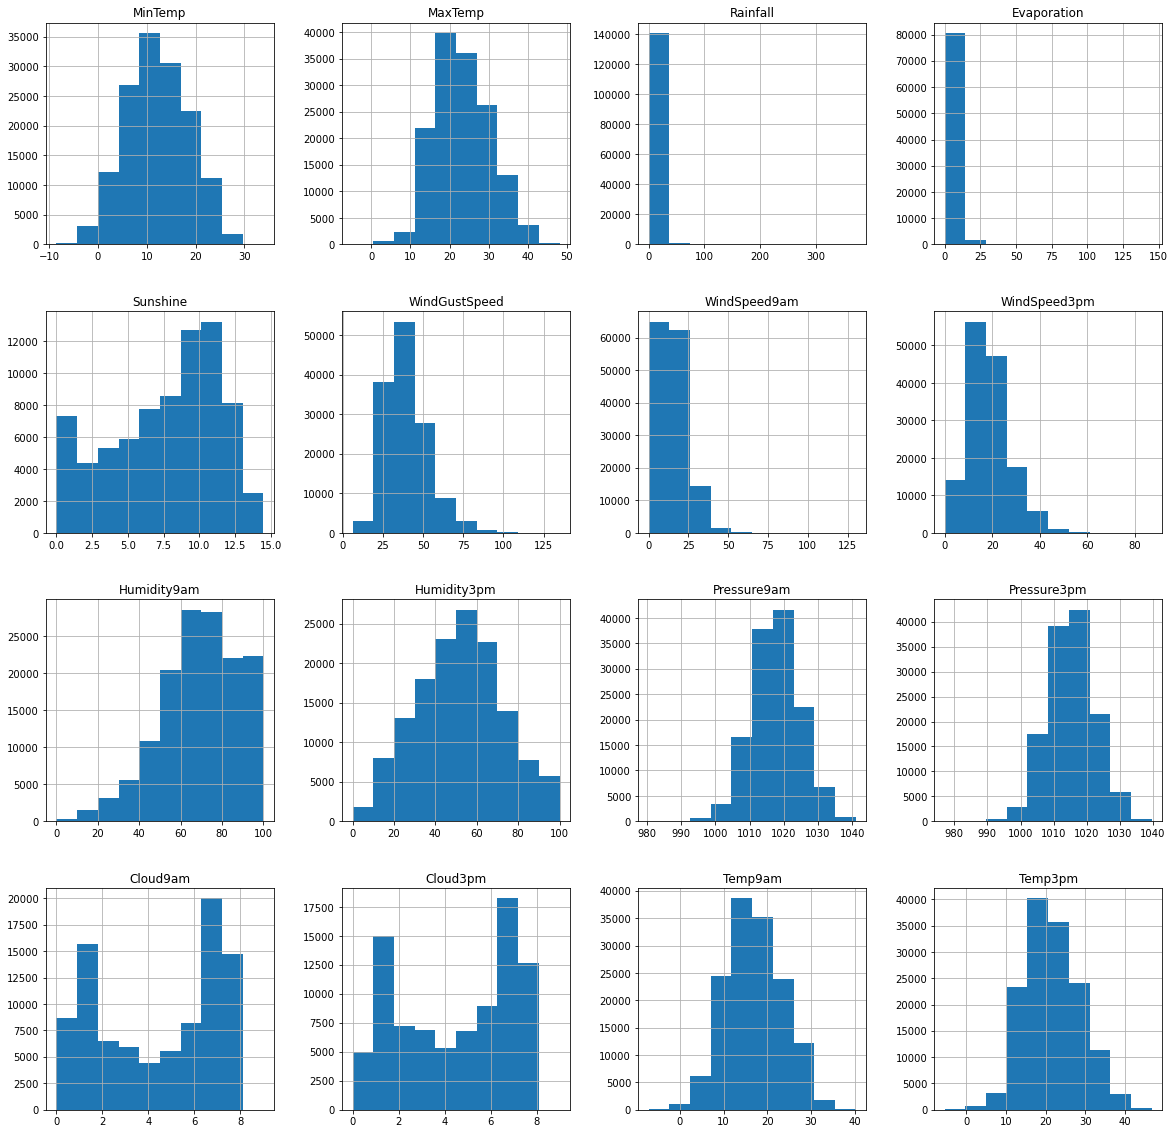

In [8]:
# Plot each column in a histogram to see what type of distribution there is when imputing

columns_with_nulls.hist(figsize=(20,20))
plt.savefig('Visualizations/ColumnsHist.png', bbox_inches = 'tight')

In [9]:
rain_data.info(1, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

As we can see, Evaporation, Sunshine, and cloud data all have a large amount of nulls. Let's normalize our data and take a deeper look into these variables.

In [10]:
rain_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


The following code is to create meaningful information about our null values, so that we can impute them in a more educated manner. 

In [11]:
# Dropping NAs to obtain distribution for data that isn't NA

rain_data_cloud_dropna = rain_data.dropna(axis=0, subset=['Cloud3pm','Cloud9am'])

In [12]:
# Dropping NAs to obtain distribution for data that isn't NA

rain_data_sunshine_dropna = rain_data.dropna(axis=0, subset=['Sunshine'])

In [13]:
# Checking null sunshine data against rain data to see what the population looks like

rain_data_sunshine_nulls = rain_data[rain_data['Sunshine'].isna()]
rain_data_sunshine_nulls['RainToday'].value_counts()

No     52760
Yes    15060
Name: RainToday, dtype: int64

In [14]:
# Removing nulls from sunshine data and biforcating the population to get means for sunshine when it rains vs not.

sunshine_when_rain = rain_data_sunshine_dropna[rain_data_sunshine_dropna['RainToday']=="Yes"]
sunshine_no_rain = rain_data_sunshine_dropna[rain_data_sunshine_dropna['RainToday']=="No"]

In [15]:
# Checking evaporation mean when sunshine is greater than zero

evaporation_test = rain_data.loc[rain_data['Sunshine']>0.0,'Evaporation']

In [16]:
# Checking the mean of cloud data when it doesn't rain and humidity is high/low 
# (Population is not normal without humidity check)

cloud9_no_rain_lower_humidity = rain_data.loc[(rain_data['RainToday']=='No') & (rain_data['Humidity9am']<=70.0),'Cloud9am']
cloud9_no_rain_higher_humidity = rain_data.loc[(rain_data['RainToday']=='No') & (rain_data['Humidity9am']>=70.0),'Cloud9am']
cloud3_no_rain_lower_humidity = rain_data.loc[(rain_data['RainToday']=='No') & (rain_data['Humidity3pm']<=70.0),'Cloud3pm']
cloud3_no_rain_higher_humidity = rain_data.loc[(rain_data['RainToday']=='No') & (rain_data['Humidity3pm']>=70.0),'Cloud3pm']

In [17]:
# Checking the mean of cloud data when it does rain

cloud9_rain = rain_data.loc[rain_data['RainToday']=='Yes','Cloud9am']
cloud3_rain = rain_data.loc[rain_data['RainToday']=='Yes','Cloud3pm']

In [18]:
# Checking null data to see how many records have both null cloud data and sunshine data.

test = []

for index in range(0,145460,1):
    if pd.isna(rain_data['Cloud3pm'].loc[index]) and pd.isna(rain_data['Cloud9am'].loc[index]):
        if pd.notna(rain_data['Sunshine'].loc[index]):
            test.append('Sunshine')
        elif pd.isna(rain_data['Sunshine'].loc[index]):
            test.append('Neither')
        else:
            pass
    elif pd.notna(rain_data['Cloud3pm'].loc[index]) or pd.notna(rain_data['Cloud9am'].loc[index]):
        if pd.notna(rain_data['Sunshine'].loc[index]):
            test.append('Both')
        elif pd.isna(rain_data['Sunshine'].loc[index]):
            test.append('Clouds')
        else:
            pass
    else:
        pass

In [19]:
print("There are " + str(test.count('Sunshine')) + " records of sunshine data with no cloud data.")
print("There are " + str(test.count('Clouds')) + " records of cloud data with no sunshine data.")
print("There are " + str(test.count('Neither')) + " records of neither sunshine or cloud data.")
print("There are " + str(test.count('Both')) + " records of both sunshine and cloud data.")

There are 8258 records of sunshine data with no cloud data.
There are 26349 records of cloud data with no sunshine data.
There are 43486 records of neither sunshine or cloud data.
There are 67367 records of both sunshine and cloud data.


In [20]:
test_data = {'Sunshine data with Cloud Nulls': 8258, 'Cloud Data with Sunshine Nulls': 26349, 'Both Null': 45486, 'Neither Null': 67367}

In [21]:
# Checking the records to see the relationship between cloud data and sunshine data

test2 = []

for index in range(0,145460,1):
    if rain_data['Cloud3pm'].loc[index]== 0  or rain_data['Cloud9am'].loc[index]==0:
        if rain_data['Sunshine'].loc[index] != 0:
            test2.append('Sunshine')
        elif rain_data['Sunshine'].loc[index]==0:
            test2.append('Neither')
        else:
            pass
    elif rain_data['Cloud3pm'].loc[index]!=0 or rain_data['Cloud9am'].loc[index]!=0:
        if rain_data['Sunshine'].loc[index]!=0:
            test2.append('Both')
        elif rain_data['Sunshine'].loc[index]==0:
            test2.append('Clouds')
        else:
            pass
    else:
        pass

In [22]:
print("There are " + str(test2.count('Sunshine')) + " records of sunshine data with 0 cloud coverage.")
print("There are " + str(test2.count('Clouds')) + " records of cloud data with 0 sunshine hours.")
print("There are " + str(test2.count('Neither')) + " records of no sunshine or cloud coverage.")
print("There are " + str(test2.count('Both')) + " records of sunshine and cloud coverage.")

There are 10350 records of sunshine data with 0 cloud coverage.
There are 2355 records of cloud data with 0 sunshine hours.
There are 4 records of no sunshine or cloud coverage.
There are 132751 records of sunshine and cloud coverage.


In [23]:
test2_data = {'Sunshine with 0 Clouds': 10350, 'Clouds with 0 sunshine': 2355, 'Neither': 4, 'Both': 139839}

In [24]:
rain_data['RainToday'].value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

In [25]:
rain_data_today = {'Did Not Rain':113580,'Rained':31880}

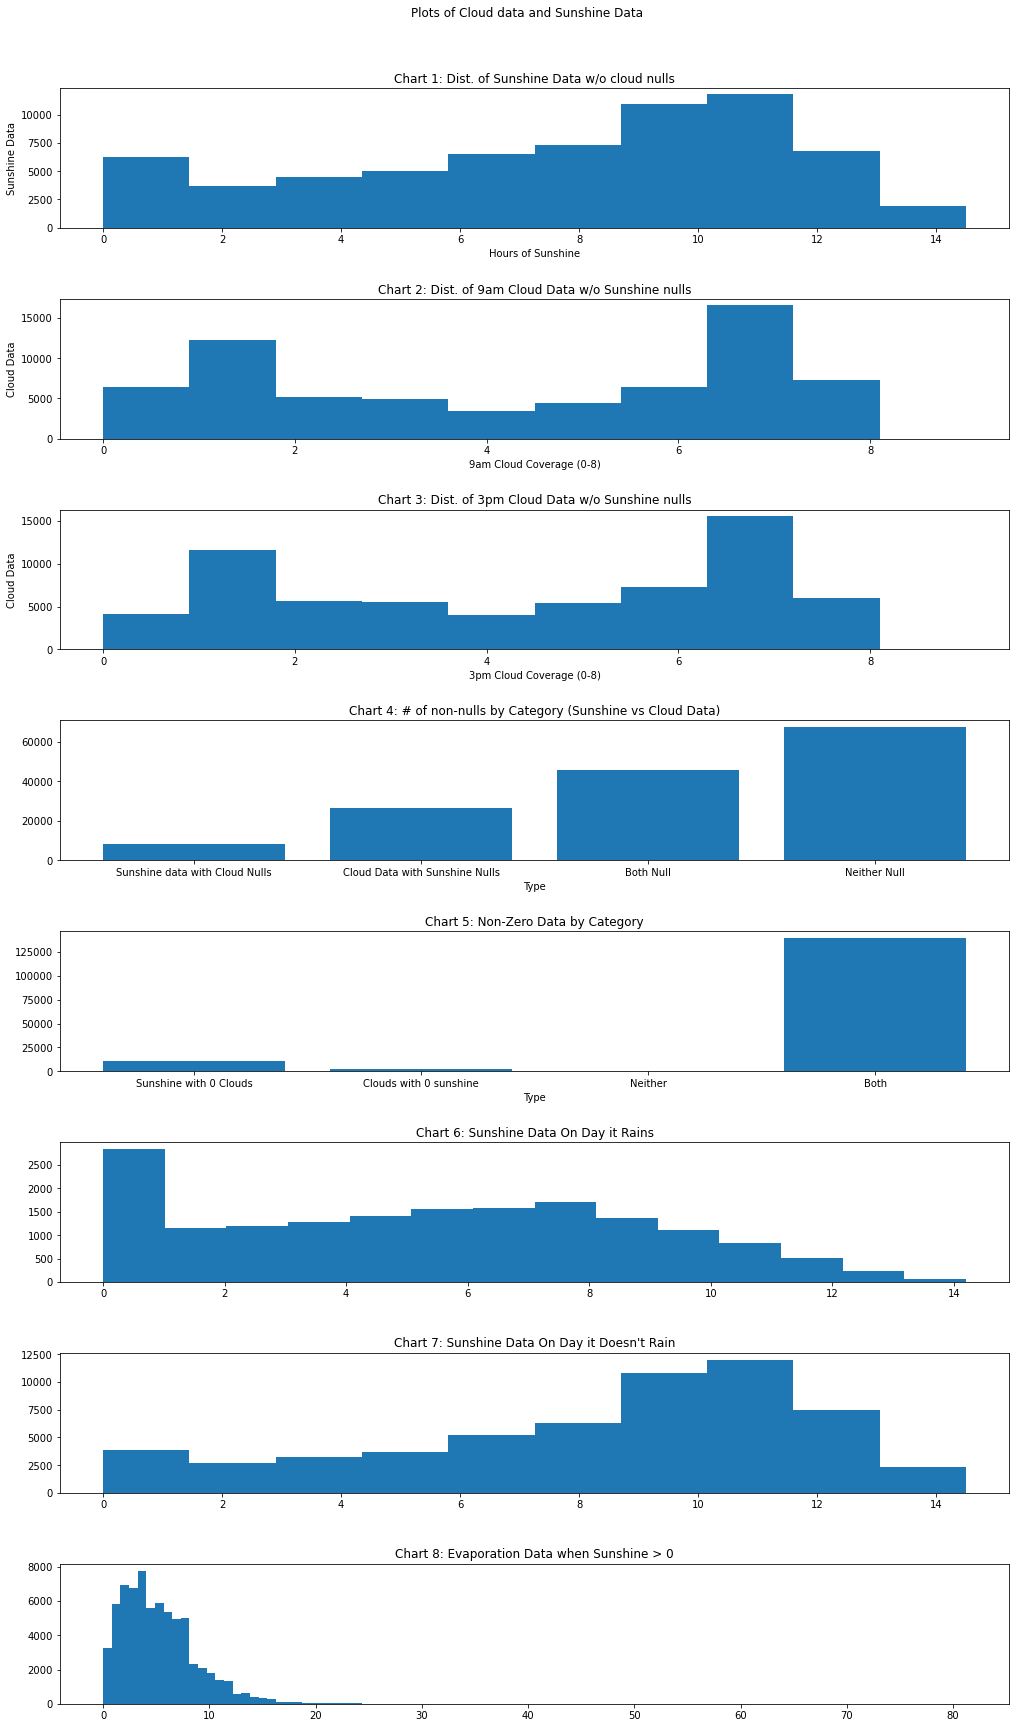

In [26]:
# Create subplot for all of our tests/findings

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(8, 1, figsize=(15,25))
fig.suptitle('Plots of Cloud data and Sunshine Data')
fig.tight_layout(pad=5.0)

# This is a distribution for sunshine data that eliminates cloud nulls.
ax1.set_title('Chart 1: Dist. of Sunshine Data w/o cloud nulls')
ax1.hist(rain_data_cloud_dropna['Sunshine'])
ax1.set_xlabel('Hours of Sunshine')
ax1.set_ylabel('Sunshine Data')

# This is a distribution for cloud data that eliminates sunshine nulls. It is not normally distributed so it is 
# hard to impute these values without further biforcation.
ax2.set_title('Chart 2: Dist. of 9am Cloud Data w/o Sunshine nulls')
ax2.hist(rain_data_sunshine_dropna['Cloud9am'])
ax2.set_xlabel('9am Cloud Coverage (0-8)')
ax2.set_ylabel('Cloud Data')

# This is a distribution for cloud data that eliminates sunshine nulls. It is not normally distributed so it is 
# hard to impute these values without further biforcation.
ax3.set_title('Chart 3: Dist. of 3pm Cloud Data w/o Sunshine nulls')
ax3.hist(rain_data_sunshine_dropna['Cloud3pm'])
ax3.set_xlabel('3pm Cloud Coverage (0-8)')
ax3.set_ylabel('Cloud Data')

# Here we plot the population of nulls and their relationships. Perhaps there is a relationship between 
# clouds and sunshine that we can impute. When both records are null, this requires more information.
ax4.set_title('Chart 4: # of non-nulls by Category (Sunshine vs Cloud Data)')
ax4.bar(test_data.keys(),test_data.values())
ax4.set_xlabel('Type')

# Checking the data for zeros.
ax5.set_title('Chart 5: Non-Zero Data by Category')
ax5.bar(test2_data.keys(),test2_data.values())
ax5.set_xlabel('Type')

# Here we find the distribution for days it does rain, and the relevant mean.
ax6.set_title('Chart 6: Sunshine Data On Day it Rains')
ax6.hist(sunshine_when_rain['Sunshine'],bins=14)

# Here we find the distribution for days it doesn't rain, and the relevant mean.
ax7.set_title("Chart 7: Sunshine Data On Day it Doesn't Rain")
ax7.hist(sunshine_no_rain['Sunshine'])

# Here is the distribution for evaporation when sunshine is greater than zero.
ax8.set_title("Chart 8: Evaporation Data when Sunshine > 0")
ax8.hist(evaporation_test,bins=100)
plt.savefig('Visualizations/Subplot1.png', bbox_inches = 'tight')
plt.show()

Here are the actionable insights gained from the charts above:

* **Chart 1**: For Sunshine Data overall and with cloud nulls filtered out, it appears to be normally distributed with a slight skew to the left. There are also many zeroes, which can be explained by rainy days.


* **Chart 2 and 3**: For Cloud Data overall and with Sunshine nulls removed, the data appears to be hump shaped, with one large hump at a 1 on the scale, and another large hump at a 7 on the scale. 


* **Chart 4**: This chart is designed to look at the overall null population, to further understand what data we will need to impute. For our cloud data with sunshine nulls, I would recommend looking further into the rain data to determine how we should handle imputing sunshine values. For sunshine data with cloud nulls, I will impute based off of both the humps; if it rained, I will use the 7 hump, if it did not rain, I will use the 1 hump. If both are null, I will have to use only rain data to determine how I would like to handle these values.


* **Chart 5**: I made this chart to see situations where there are clouds with 0 sunshine, and sunshine with 0 clouds. These values appear to be minimal.


* **Chart 6 and 7**: I created charts here to see how many hours of sunshine there are when it rains, and when it doesn't rain. This could help us biforcate our population of sunshine data so that I am not imputing the mean onto data that doesn't represent the mean.

* **Chart 8**: This shows evaporation data when Sunshine > 0. We can impute the mean here onto our evaporation nulls.


We need to dive deeper into cloud data in order to figure out how to replace nulls. Please see graphs below for more details about our cloud data:

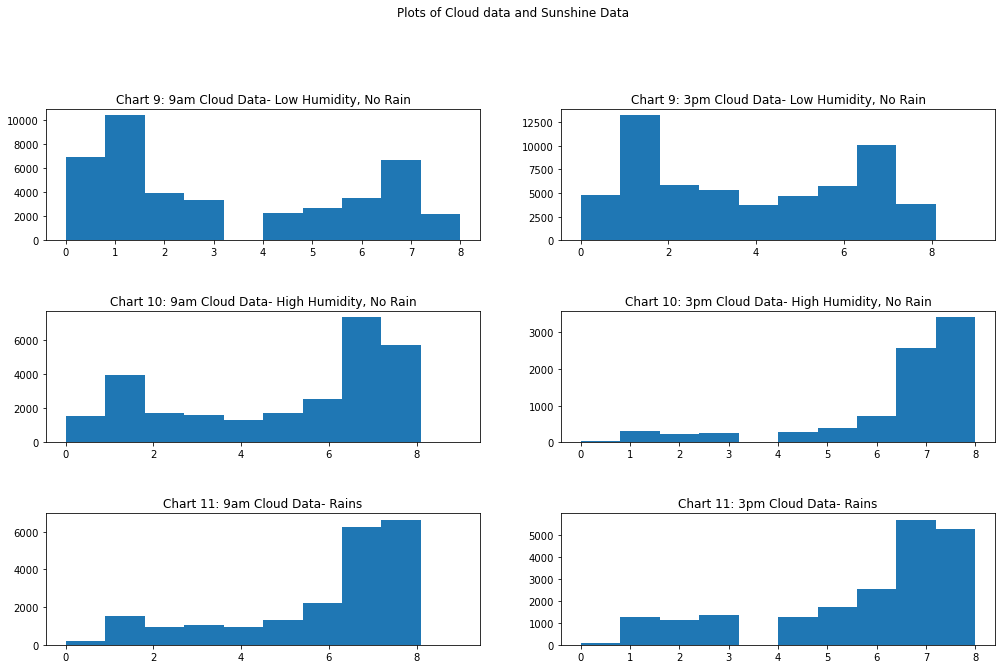

In [27]:
# Now I am going to make a subplot looking into the results of our cloud tests.

fig, ((ax1, ax4), (ax2, ax5), (ax3, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
fig.suptitle('Plots of Cloud data and Sunshine Data')
fig.tight_layout(pad=5.0)

# This is a graph for our cloud data when there is low humidity and it does not rain
ax1.set_title('Chart 9: 9am Cloud Data- Low Humidity, No Rain')
ax1.hist(cloud9_no_rain_lower_humidity)

# This is a graph for our cloud data when there is high humidity and it does not rain
ax2.set_title('Chart 10: 9am Cloud Data- High Humidity, No Rain')
ax2.hist(cloud9_no_rain_higher_humidity)

# This is a graph for our cloud data when it does rain.
ax3.set_title('Chart 11: 9am Cloud Data- Rains')
ax3.hist(cloud9_rain)

# This is a graph for our cloud data when there is low humidity and it does not rain
ax4.set_title('Chart 9: 3pm Cloud Data- Low Humidity, No Rain')
ax4.hist(cloud3_no_rain_lower_humidity)

# This is a graph for our cloud data when there is high humidity and it does not rain
ax5.set_title('Chart 10: 3pm Cloud Data- High Humidity, No Rain')
ax5.hist(cloud3_no_rain_higher_humidity)

# This is a graph for our cloud data when it does rain.
ax6.set_title('Chart 11: 3pm Cloud Data- Rains')
ax6.hist(cloud3_rain)

plt.savefig('Visualizations/Subplot2.png', bbox_inches = 'tight')

Let's breakdown our Cloud data:

* **Chart 9**: As we can see here, in our data when it doesn't rain and humidity is less than 70%, our Cloud data has a mean closer to 1. I will fill the nulls meeting this criteria using a lower cloud coverage.

* **Chart 10**: As we can see here, in our data when it doesn't rain and humidity is greater than 70%, our Cloud data has a mean closer to 7 or 8. I will fill the nulls meeting this criteria using a higher cloud coverage.

* **Chart 11**: As we can see here, in our data when it does rain, our Cloud data has a mean closer to 7 or 8. I will fill the nulls meeting this criteria using a higher cloud coverage.

Now that I have an understanding of the data, I will perform the train/test split, and begin imputing these null values.

# Section 3: Data Preparation

Before performing the train/test split, I am going to create dummy variables for our categorical fields and normalize our data.

In [28]:
# Convert categorical columns using get_dummies(). We drop the first column for each dummy variable to avoid
# the dummy variable trap.

cat_feats = ['Location','WindGustDir', 'WindDir9am','WindDir3pm','RainToday','RainTomorrow']
rain_data_cat = pd.get_dummies(rain_data[cat_feats], drop_first=True, dtype=float)

In [29]:
# Combine dummy variables and original data, and drop original categorical columns

rain_data = pd.concat([rain_data,rain_data_cat], axis=1)
rain_data = rain_data.drop(['Date','Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow'], axis=1)

In [30]:
# Separate target variable from data and complete train-test split

y = rain_data['RainTomorrow_Yes']
X = rain_data.drop('RainTomorrow_Yes', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [31]:
# Reset index and drop it

X_train.reset_index(inplace=True)
X_train = X_train.drop(columns=['index'],axis=1)
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,9.5,17.2,0.8,NaN,NaN,NaN,4.0,19.0,77.0,67.0,NaN,NaN,5.0,6.0,13.2,16.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.0,13.8,16.6,1.2,NaN,26.0,11.0,15.0,95.0,89.0,1014.5,1011.7,8.0,7.0,11.9,12.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,25.7,32.4,0.0,6.2,8.9,37.0,19.0,17.0,77.0,56.0,1013.3,1010.2,3.0,6.0,28.1,31.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12.1,27.3,0.0,6.2,12.3,33.0,13.0,20.0,76.0,40.0,1008.6,1005.5,7.0,1.0,17.8,26.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.1,20.1,0.0,NaN,NaN,48.0,7.0,26.0,55.0,52.0,1009.5,1006.8,7.0,7.0,15.4,15.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [32]:
X_train.info(1, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109095 entries, 0 to 109094
Data columns (total 110 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   MinTemp                    107967 non-null  float64
 1   MaxTemp                    108127 non-null  float64
 2   Rainfall                   106650 non-null  float64
 3   Evaporation                62157 non-null   float64
 4   Sunshine                   56836 non-null   float64
 5   WindGustSpeed              101334 non-null  float64
 6   WindSpeed9am               107762 non-null  float64
 7   WindSpeed3pm               106769 non-null  float64
 8   Humidity9am                107087 non-null  float64
 9   Humidity3pm                105700 non-null  float64
 10  Pressure9am                97737 non-null   float64
 11  Pressure3pm                97758 non-null   float64
 12  Cloud9am                   67255 non-null   float64
 13  Cloud3pm                   6

In [33]:
# Impute sunshine data based off of our findings from above

X_train['Sunshine'] = np.where(((X_train['Sunshine'].isna()) & (X_train['RainToday_Yes'] == 1.0)), 0.0, X_train["Sunshine"])
X_train['Sunshine'] = np.where(((X_train['Sunshine'].isna()) & (X_train['RainToday_Yes'] == 0.0)), 7.0, X_train["Sunshine"])

In [34]:
X_train['Sunshine'].isna().any()

False

In [35]:
X_train['Sunshine'].value_counts()

7.0     41364
0.0     13057
11.0      840
10.7      838
10.8      801
10.9      778
10.5      761
10.2      750
10.3      743
11.1      741
10.4      736
10.6      736
10.0      732
9.8       721
10.1      703
9.2       701
11.2      690
9.9       661
9.5       652
9.6       634
9.7       628
9.4       624
9.3       621
11.3      578
9.0       571
8.8       569
11.4      561
9.1       558
8.9       539
8.4       536
8.2       517
8.7       517
8.5       507
11.6      507
8.0       502
7.8       496
8.6       480
8.3       474
12.0      464
13.0      461
7.2       454
8.1       453
7.1       448
7.5       447
11.7      436
13.2      435
12.7      433
6.3       432
7.3       431
13.1      431
7.6       431
11.9      429
11.5      429
6.8       422
7.7       417
12.2      411
11.8      408
0.1       407
6.1       401
7.9       394
6.9       394
7.4       394
6.0       391
0.2       390
12.5      390
6.5       378
5.7       375
6.2       374
6.6       366
12.1      366
12.4      363
5.0   

In [36]:
# Impute zero evaporation when sunshine is zero

X_train['Evaporation'] = np.where(((X_train['Evaporation'].isna()) & (X_train['Sunshine'] == 0.0)), 0.0, X_train["Evaporation"])

In [37]:
evaporation_test.sum()/len(evaporation_test)

5.022348701990008

In [38]:
# Impute mean evaporation when sunshine is not zero

X_train['Evaporation'] = np.where(((X_train['Evaporation'].isna()) & (X_train['Sunshine'] > 0.0)), 5.0, X_train["Evaporation"])

In [39]:
X_train['Evaporation'].isna().any()

False

In [40]:
X_train['Evaporation'].value_counts().head()

5.0    38469
0.0     9988
4.0     2507
8.0     1945
2.2     1587
Name: Evaporation, dtype: int64

In [41]:
print(cloud9_no_rain_lower_humidity.value_counts())
print(cloud9_no_rain_higher_humidity.value_counts())
print(cloud9_rain.value_counts())
print(cloud3_no_rain_lower_humidity.value_counts())
print(cloud3_no_rain_higher_humidity.value_counts())
print(cloud3_rain.value_counts())

1.0    10401
0.0     6939
7.0     6647
2.0     3940
6.0     3477
3.0     3353
5.0     2643
4.0     2221
8.0     2146
Name: Cloud9am, dtype: int64
7.0    7297
8.0    5688
1.0    3926
6.0    2563
2.0    1697
5.0    1694
3.0    1578
0.0    1537
4.0    1288
9.0       1
Name: Cloud9am, dtype: int64
8.0    6634
7.0    6233
6.0    2227
1.0    1516
5.0    1293
3.0    1063
4.0     958
2.0     941
0.0     225
9.0       1
Name: Cloud9am, dtype: int64
1.0    13262
7.0    10089
2.0     5833
6.0     5735
3.0     5295
0.0     4769
5.0     4672
8.0     3821
4.0     3778
9.0        1
Name: Cloud3pm, dtype: int64
8.0    3397
7.0    2567
6.0     711
5.0     395
1.0     303
4.0     271
3.0     256
2.0     231
0.0      43
Name: Cloud3pm, dtype: int64
7.0    5679
8.0    5245
6.0    2552
5.0    1734
3.0    1342
1.0    1280
4.0    1253
2.0    1118
0.0      89
Name: Cloud3pm, dtype: int64


In [42]:
# Imputing cloud data based on our findings from section 2

X_train['Cloud9am'] = np.where(((X_train['Cloud9am'].isna()) & (X_train['RainToday_Yes'] == 1.0)), 8.0, X_train["Cloud9am"])
X_train['Cloud3pm'] = np.where(((X_train['Cloud3pm'].isna()) & (X_train['RainToday_Yes'] == 1.0)), 7.0, X_train["Cloud3pm"])
X_train['Cloud9am'] = np.where(((X_train['Cloud9am'].isna()) & (X_train['RainToday_Yes'] == 0.0) & (X_train['Humidity9am']<=70.0)), 1.0, X_train["Cloud9am"])
X_train['Cloud9am'] = np.where(((X_train['Cloud9am'].isna()) & (X_train['RainToday_Yes'] == 0.0) & (X_train['Humidity9am']>70.0)), 7.0, X_train["Cloud9am"])
X_train['Cloud3pm'] = np.where(((X_train['Cloud3pm'].isna()) & (X_train['RainToday_Yes'] == 0.0) & (X_train['Humidity3pm']<=70.0)), 1.0, X_train["Cloud3pm"])
X_train['Cloud3pm'] = np.where(((X_train['Cloud3pm'].isna()) & (X_train['RainToday_Yes'] == 0.0) & (X_train['Humidity3pm']>70.0)), 8.0, X_train["Cloud3pm"])

In [43]:
X_train['Cloud9am'].value_counts()

1.0    29995
7.0    28962
8.0    19147
0.0     6443
6.0     6158
2.0     4919
3.0     4432
5.0     4217
4.0     3352
9.0        2
Name: Cloud9am, dtype: int64

In [44]:
X_train['Cloud3pm'].value_counts()

1.0    40418
7.0    22409
8.0    13608
6.0     6728
2.0     5401
3.0     5176
5.0     5166
4.0     3981
0.0     3719
9.0        1
Name: Cloud3pm, dtype: int64

In [45]:
# Imputing remaining columns based on mean, from our charts in section 2

imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(X_train)
X_train.iloc[:,:] = imputer.transform(X_train)

In [46]:
X_train.info(1, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109095 entries, 0 to 109094
Data columns (total 110 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   MinTemp                    109095 non-null  float64
 1   MaxTemp                    109095 non-null  float64
 2   Rainfall                   109095 non-null  float64
 3   Evaporation                109095 non-null  float64
 4   Sunshine                   109095 non-null  float64
 5   WindGustSpeed              109095 non-null  float64
 6   WindSpeed9am               109095 non-null  float64
 7   WindSpeed3pm               109095 non-null  float64
 8   Humidity9am                109095 non-null  float64
 9   Humidity3pm                109095 non-null  float64
 10  Pressure9am                109095 non-null  float64
 11  Pressure3pm                109095 non-null  float64
 12  Cloud9am                   109095 non-null  float64
 13  Cloud3pm                   1

In [47]:
y_train.count()

109095

In [48]:
X_test.info(1, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36365 entries, 90371 to 108823
Data columns (total 110 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MinTemp                    36008 non-null  float64
 1   MaxTemp                    36072 non-null  float64
 2   Rainfall                   35549 non-null  float64
 3   Evaporation                20513 non-null  float64
 4   Sunshine                   18789 non-null  float64
 5   WindGustSpeed              33863 non-null  float64
 6   WindSpeed9am               35931 non-null  float64
 7   WindSpeed3pm               35629 non-null  float64
 8   Humidity9am                35719 non-null  float64
 9   Humidity3pm                35253 non-null  float64
 10  Pressure9am                32658 non-null  float64
 11  Pressure3pm                32674 non-null  float64
 12  Cloud9am                   22317 non-null  float64
 13  Cloud3pm                   21493 non-nul

In [49]:
X_test.reset_index(inplace=True)

In [50]:
X_test = X_test.drop(columns=['index'],axis=1)

In [51]:
# Performing same imputations as train data

X_test['Sunshine'] = np.where(((X_test['Sunshine'].isna()) & (X_test['RainToday_Yes'] == 1.0)), 0.0, X_test["Sunshine"])
X_test['Sunshine'] = np.where(((X_test['Sunshine'].isna()) & (X_test['RainToday_Yes'] == 0.0)), 7.0, X_test["Sunshine"])
X_test['Evaporation'] = np.where(((X_test['Evaporation'].isna()) & (X_test['Sunshine'] == 0.0)), 0.0, X_test["Evaporation"])
X_test['Evaporation'] = np.where(((X_test['Evaporation'].isna()) & (X_test['Sunshine'] > 0.0)), 5.0, X_test["Evaporation"])
X_test['Cloud9am'] = np.where(((X_test['Cloud9am'].isna()) & (X_test['RainToday_Yes'] == 1.0)), 8.0, X_test["Cloud9am"])
X_test['Cloud3pm'] = np.where(((X_test['Cloud3pm'].isna()) & (X_test['RainToday_Yes'] == 1.0)), 7.0, X_test["Cloud3pm"])
X_test['Cloud9am'] = np.where(((X_test['Cloud9am'].isna()) & (X_test['RainToday_Yes'] == 0.0) & (X_test['Humidity9am']<=70.0)), 1.0, X_test["Cloud9am"])
X_test['Cloud9am'] = np.where(((X_test['Cloud9am'].isna()) & (X_test['RainToday_Yes'] == 0.0) & (X_test['Humidity9am']>70.0)), 7.0, X_test["Cloud9am"])
X_test['Cloud3pm'] = np.where(((X_test['Cloud3pm'].isna()) & (X_test['RainToday_Yes'] == 0.0) & (X_test['Humidity3pm']<=70.0)), 1.0, X_test["Cloud3pm"])
X_test['Cloud3pm'] = np.where(((X_test['Cloud3pm'].isna()) & (X_test['RainToday_Yes'] == 0.0) & (X_test['Humidity3pm']>70.0)), 8.0, X_test["Cloud3pm"])

In [52]:
# Performing same imputations as train data

imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(X_test)
X_test.iloc[:,:] = imputer.transform(X_test)

In [53]:
X_test.info(1, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36365 entries, 0 to 36364
Data columns (total 110 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MinTemp                    36365 non-null  float64
 1   MaxTemp                    36365 non-null  float64
 2   Rainfall                   36365 non-null  float64
 3   Evaporation                36365 non-null  float64
 4   Sunshine                   36365 non-null  float64
 5   WindGustSpeed              36365 non-null  float64
 6   WindSpeed9am               36365 non-null  float64
 7   WindSpeed3pm               36365 non-null  float64
 8   Humidity9am                36365 non-null  float64
 9   Humidity3pm                36365 non-null  float64
 10  Pressure9am                36365 non-null  float64
 11  Pressure3pm                36365 non-null  float64
 12  Cloud9am                   36365 non-null  float64
 13  Cloud3pm                   36365 non-null  fl

In [54]:
y_test.count()

36365

In [55]:
# Normalizing our data onto a scale of 0-1

for col in X_train.columns:
    # Subtract the minimum and divide by the range forcing a scale of 0 to 1 for each feature
    X_train[col] = (X_train[col] - min(X_train[col]))/ (max(X_train[col]) - min(X_train[col])) 

X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,0.445545,0.415879,0.002874,0.034483,0.482759,0.264010,0.030769,0.228916,0.767677,0.67,0.604128,0.610513,0.555556,0.666667,0.430380,0.421359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.482673,0.351607,0.059626,0.008276,0.000000,0.155039,0.084615,0.180723,0.949495,0.89,0.550847,0.553600,0.888889,0.777778,0.402954,0.351456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.846535,0.703214,0.000000,0.042759,0.613793,0.240310,0.146154,0.204819,0.767677,0.56,0.530508,0.529600,0.333333,0.666667,0.744726,0.712621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.509901,0.606805,0.000000,0.042759,0.848276,0.209302,0.100000,0.240964,0.757576,0.40,0.450847,0.454400,0.777778,0.111111,0.527426,0.611650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.386139,0.470699,0.000000,0.034483,0.482759,0.325581,0.053846,0.313253,0.545455,0.52,0.466102,0.475200,0.777778,0.777778,0.476793,0.409709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [56]:
# Normalizing our data onto a scale of 0-1

for col in X_test.columns:
    # Subtract the minimum and divide by the range forcing a scale of 0 to 1 for each feature
    X_test[col] = (X_test[col] - min(X_test[col]))/ (max(X_test[col]) - min(X_test[col])) 

X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,0.629454,0.590196,0.002156,0.077160,0.48951,0.272727,0.324324,0.080460,0.68,0.850000,0.732888,0.737815,0.125,1.000000,0.677201,0.527559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.261283,0.360784,0.000000,0.030864,0.48951,0.154545,0.121622,0.149425,0.68,0.390000,0.771285,0.761345,0.125,0.125000,0.293454,0.364173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.460808,0.654902,0.000000,0.077160,0.48951,0.509091,0.121622,0.213739,0.70,0.514916,0.469115,0.609284,0.125,0.485249,0.562077,0.507732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.565321,0.852941,0.000000,0.077160,0.48951,0.527273,0.054054,0.402299,0.49,0.120000,0.437396,0.339496,0.125,0.125000,0.663657,0.832677,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.308789,0.486275,0.000000,0.077160,0.48951,0.272727,0.175676,0.172414,0.61,0.470000,0.796327,0.774790,0.125,0.125000,0.428894,0.490157,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [57]:
y_train

15678     1.0
7268      0.0
139546    1.0
65289     0.0
63162     1.0
138102    0.0
37536     0.0
104356    0.0
142557    0.0
89685     0.0
100407    0.0
7394      0.0
126111    0.0
84554     0.0
29054     0.0
19431     0.0
124155    0.0
55609     1.0
25210     1.0
88308     1.0
113667    0.0
11642     1.0
5503      0.0
93845     0.0
48703     0.0
49325     0.0
54972     0.0
53326     0.0
80454     0.0
26740     0.0
90166     0.0
37355     0.0
113256    0.0
45335     0.0
87581     1.0
134604    0.0
718       0.0
126010    0.0
53188     0.0
71382     0.0
5165      1.0
87324     0.0
132395    1.0
107805    0.0
45185     0.0
4651      0.0
18790     0.0
36052     0.0
143482    0.0
16494     0.0
49011     0.0
59715     0.0
3532      0.0
108863    0.0
43273     0.0
100201    0.0
80620     0.0
95240     0.0
79179     1.0
74173     0.0
53911     0.0
3509      0.0
15221     0.0
53901     0.0
145271    0.0
139414    0.0
78906     1.0
7948      1.0
61917     0.0
77315     1.0
31464     0.0
108938

# Section 4: Modeling

To begin, I will build a logistic model. After that, I will be building a kNN model and a decision tree model, and will pick the best model from the three.

#### Logistic Regression

In [58]:
# Create a Baseline Model

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)
model_log.score(X_test,y_test)

0.8418534304963564

In [59]:
# Check Train and Validation

y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

In [60]:
# Train Data

residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0.0    92412
1.0    16683
Name: RainTomorrow_Yes, dtype: int64
0.0    0.847078
1.0    0.152922
Name: RainTomorrow_Yes, dtype: float64


In [61]:
# Validation Data

residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0.0    30614
1.0     5751
Name: RainTomorrow_Yes, dtype: int64
0.0    0.841853
1.0    0.158147
Name: RainTomorrow_Yes, dtype: float64


Our new model is slightly better than the baseline model. It does not appear that we are overfitting based on the fact that our validation score is better than our training score. Now I will run various models through a Pipeline to see if I can find a combination of parameters to bring down the log loss.

In [62]:
# Create pipeline

lr_pipeline_1 = Pipeline([('ss', StandardScaler()), 
                              ('lr', LogisticRegression())])

In [63]:
# Create grid using GridSearchCV

lr_grid = [{'lr__random_state':[42],
         'lr__class_weight': [{1:.6},"balanced","auto"],
         'lr__C': [1,1e5,1e12,1e17],
         'lr__solver': ['saga','liblinear']}]

In [64]:
# Create grid using GridSearchCV

lr_gridsearch = GridSearchCV(estimator=lr_pipeline_1, 
                          param_grid=lr_grid, 
                          scoring='accuracy', 
                          cv=3)

In [65]:
# Fit the training data
lr_gridsearch.fit(X_train, y_train)
print(lr_gridsearch.score(X_test, y_test))

0.841468444933315


In [66]:
# Print best parameters

print(lr_gridsearch.best_params_)

{'lr__C': 1, 'lr__class_weight': 'auto', 'lr__random_state': 42, 'lr__solver': 'saga'}


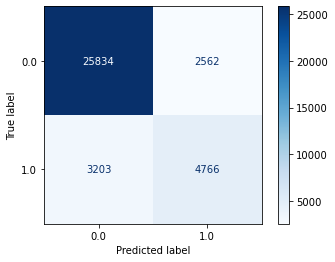

In [67]:
# Create confusion matrix for best model 

plot_confusion_matrix(lr_gridsearch, X_test, y_test,
                     cmap=plt.cm.Blues)
plt.grid(False)
plt.savefig('Visualizations/LogRegBest.png', bbox_inches = 'tight')
plt.show()

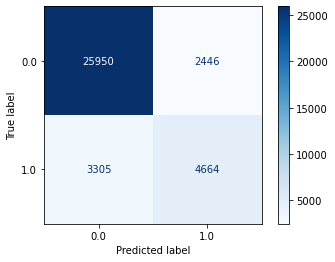

In [68]:
# Create confusion matrix for baseline model 

plot_confusion_matrix(logreg, X_test, y_test,
                     cmap=plt.cm.Blues)
plt.grid(False)
plt.savefig('Visualizations/LogRegBase.png', bbox_inches = 'tight')
plt.show()

#### k-Nearest Neighbors

In [69]:
# Create baseline model

knn_baseline_model = KNeighborsClassifier()

knn_baseline_log_loss = cross_val_score(knn_baseline_model, X_train, y_train, scoring="accuracy").mean()
knn_baseline_log_loss

0.804940648059031

Next, I will build a model using Pipeline and kNN to check score using a set of different parameters:

In [70]:
# Creating 3 different tests using different parameters

knn_pipeline_1 = Pipeline([('ss', StandardScaler()), 
                              ('knn', KNeighborsClassifier())])

knn_pipeline_2 = Pipeline([('ss', StandardScaler()), 
                              ('knn', KNeighborsClassifier(n_neighbors=50))])

knn_pipeline_3 = Pipeline([('ss', StandardScaler()), 
                              ('knn', KNeighborsClassifier(n_neighbors=75, algorithm="auto",metric="euclidean"))])

In [71]:
# Fit the training data to pipeline
knn_pipeline_1.fit(X_train, y_train)

# Print the accuracy on test set
knn_pipeline_1.score(X_test, y_test)


0.8098996287639213

In [72]:
# Fit the training data to pipeline
knn_pipeline_2.fit(X_train, y_train)

# Print the accuracy on test set
knn_pipeline_2.score(X_test, y_test)

0.8121270452358037

In [73]:
# Fit the training data to pipeline
knn_pipeline_3.fit(X_train, y_train)

# Print the accuracy on test set
knn_pipeline_3.score(X_test, y_test)

0.8098996287639213

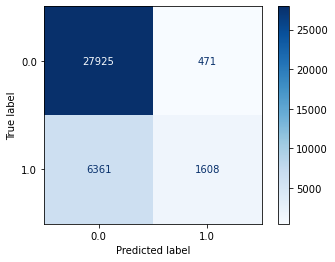

In [74]:
# Create confusion matrix

plot_confusion_matrix(knn_pipeline_2, X_test, y_test,
                     cmap=plt.cm.Blues)
plt.grid(False)
plt.savefig('Visualizations/KNN.png', bbox_inches = 'tight')
plt.show()

As we can see above, our best model seems to cap at a score of around .81. I will now use decision trees and Grid Search CV to see if they generate a stronger model.

**Decision Trees**

In [75]:
# Create pipeline

dtree_pipeline = Pipeline([('ss', StandardScaler()), 
                              ('dt', DecisionTreeClassifier())])

In [76]:
# Use GridSearchCV to create different models

dt_grid = [{'dt__criterion': ["entropy"], 
         'dt__class_weight': [{1:.6},{1:2},'auto',"balanced"],
         'dt__max_leaf_nodes': [5,10,20],
         'dt__min_samples_split': [0,.2,.5,1],
         'dt__max_features': [45],
          'dt__random_state':[42]}]

In [77]:
# Use GridSearchCV to create different models

dt_gridsearch = GridSearchCV(estimator=dtree_pipeline, 
                          param_grid=dt_grid, 
                          scoring='accuracy', 
                          cv=3)

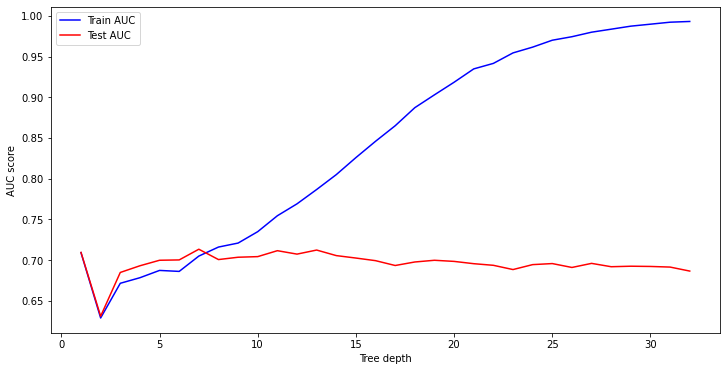

In [78]:
# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=10)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

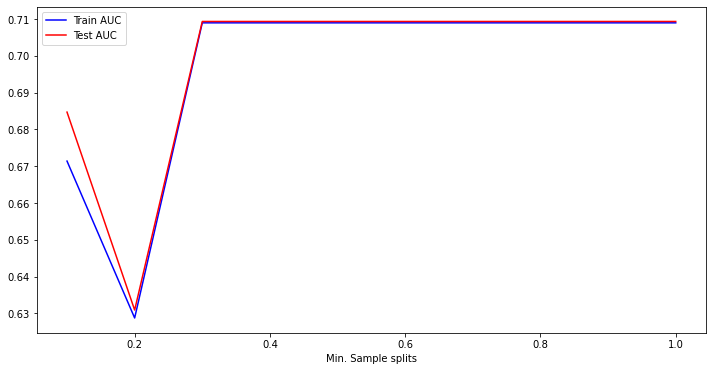

In [79]:
# Identify the optimal min-samples-split for given data
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split, random_state=10)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

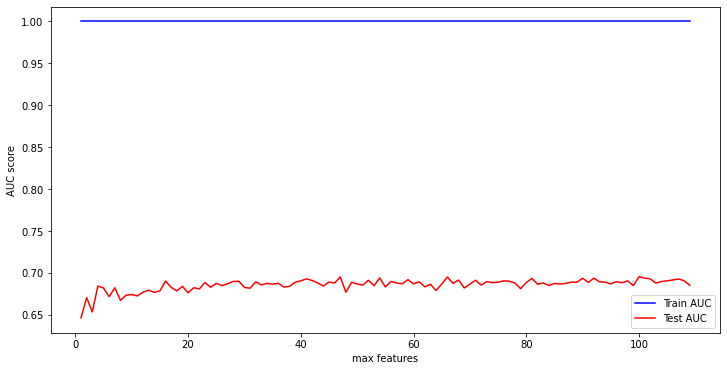

In [80]:
# Find the best value for optimal maximum feature size
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature, random_state=10)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()

In [81]:
# Fit model and print

dt_gridsearch.fit(X_train, y_train)
print(dt_gridsearch.score(X_test, y_test))

0.8244190842843393


In [82]:
print(dt_gridsearch.best_params_)

{'dt__class_weight': {1: 0.6}, 'dt__criterion': 'entropy', 'dt__max_features': 45, 'dt__max_leaf_nodes': 5, 'dt__min_samples_split': 0.2, 'dt__random_state': 42}


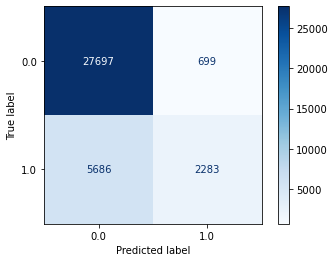

In [83]:
# Create confusion matrix

plot_confusion_matrix(dt_gridsearch, X_test, y_test,
                     cmap=plt.cm.Blues)
plt.grid(False)
plt.savefig('Visualizations/DT.png', bbox_inches = 'tight')
plt.show()

As we can see here, the best decision tree model is slightly worse than the logistic regression model, and better than our best kNN model, at an accuracy score of 82.4%. Note that our model has a large amount of false negatives.

# Section 5: Results

### Best Model

The logistic regression model is our best model, at an accuracy of around 85%. It also has the least Type 1 and Type 2 error. Now, I will take a look at the remaining metrics.

In [84]:
# Checking our our train and test data metrics

final_test = lr_gridsearch.predict(X_test)
final_train = lr_gridsearch.predict(X_train)

print("Training Data Results:\n")
print(classification_report(y_train, final_train))
print("\nTest Data Results:\n")
print(classification_report(y_test, final_test))

Training Data Results:

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     85187
         1.0       0.72      0.49      0.59     23908

    accuracy                           0.85    109095
   macro avg       0.79      0.72      0.75    109095
weighted avg       0.84      0.85      0.84    109095


Test Data Results:

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90     28396
         1.0       0.65      0.60      0.62      7969

    accuracy                           0.84     36365
   macro avg       0.77      0.75      0.76     36365
weighted avg       0.84      0.84      0.84     36365



This model has 84% accuracy, meaning that it correctly determines that it will rain the next day 84% of the time.

If our model says that it will rain tomorrow, there between a 65% chance that it is a class 1 and will actually rain the next day.

If a given cell of rain data for the next day really is class 1, there is about a 60% chance that 
our model will label it correctly.


AUC: 0.8649335414235726


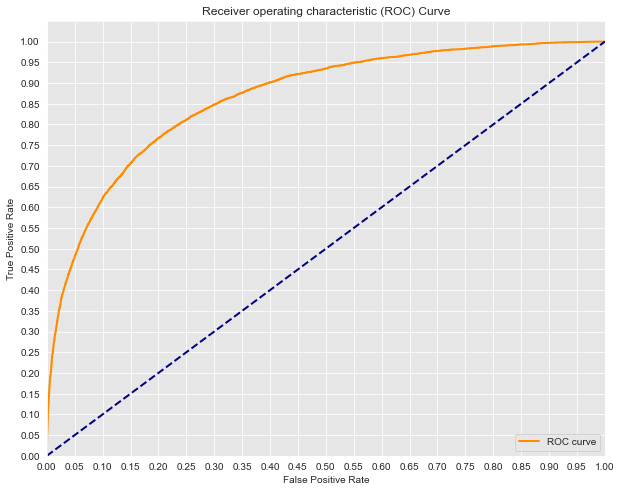

In [85]:
# Creating ROC curve to see effectiveness of model.

y_score = lr_gridsearch.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('\nAUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('Visualizations/AUC.png', bbox_inches = 'tight')
plt.show()

Our AUC Score is .86. That means that our classifiers have an 86% true positive rate. Our model seems sufficient at predicting whether or not it will rain.